<a href="https://colab.research.google.com/github/jamesakibble/MSc_thesis/blob/main/ML_code/Gradient_Boosted_Regression_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Boosted Regression (GBR) algorithm to determine the best yield prediction parameters. GridsearchCV and RandomizedCV harnessed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Import cultivar specific dataset with EO, climate, and field measurement variables
dataset = pd.read_csv('orizica_use.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(X)

[['MAM' 126 8 134 22.52 29.98 17.0 12.98 455.60000379999997 794.35 972.6
  48 4 77.50798593 22301.48 0.306839825 0.793154936 0.494255105
  0.260363357 0.6184975229999999 0.405824609 0.22844443600000003
  0.5084628179999999 0.369217412]
 ['MAM' 125 7 132 22.51 29.98 17.0 12.98 444.90000419999996 937.8 1118.2
  48 4 76.87226767 22467.8 0.39348584 0.831085657 0.6729999999999999
  0.362557959 0.626229982 0.54293627 0.29080284300000003 0.556089854
  0.501993792]
 ['SON' 125 18 143 22.43 30.68 18.13 12.55 543.8000135 913.35 1064.4 45 7
  79.10451949 24827.19 0.526354082 0.549536279 0.638432303 0.274975292
  0.48904220600000003 0.48165457899999997 0.281546904 0.363410502
  0.45406982100000004]
 ['DJF' 113 16 129 23.9 33.24 18.25 14.99 488.5000063 859.75 1106.9 38 6
  74.17561983 26098.33 0.5858536679999999 0.77443927 0.719367998
  0.436783762 0.621110552 0.610405073 0.394118198 0.55874479 0.533725595]
 ['DJF' 131 12 143 22.66 30.45 18.51 11.94 451.9999988 757.6 933.1 55 8
  78.60386009 29914.

In [ ]:
#VIF for multicollinearity testing - variables scoring >=10 removed from modelling to avoid overfitting.
X=dataset.drop(["yield", "NDVI_repro", "SAVI_ripe","EVI_ripe", "NDVI_ripe", "EVI_repro", "SAVI_veg", "EVI_veg", "NDVI_veg", "SAVI_repro", "precip_airport", "temp_range", "avg_temp", "emer_har", "total_precip", "wet_day_freq", "precip_airport_meteo", "total_length", "max_temp", "hum", "min_temp", "sunlight"], axis=1)
#vif = pd.DataFrame()
#vif["features"] = X.columns
#vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#print(vif)

In [ ]:
y = y.reshape(len(y),1)

In [ ]:
#Encoding categorical variable for model inclusion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
#pd.get_dummies(dataset, drop_first=True)
X = np.array(ct.fit_transform(X))

In [ ]:
#Splitting dataset for model performance testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## RandomizedSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Randomized cross validation to determine optimum hyprparameters
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 750, stop = 5000, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 30, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [0.5, 1, 2, 4, 8, 16, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 12, 16, 20]

learning_rate = [0.001, 0.005, 0.01, 0.04, 0.08, 0.1, 0.5, 1]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}

pprint(random_grid)

{'learning_rate': [0.001, 0.005, 0.01, 0.04, 0.08, 0.1, 0.5, 1],
 'max_depth': [1, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8, 12, 16, 20],
 'min_samples_split': [0.5, 1, 2, 4, 8, 16, 20],
 'n_estimators': [750]}


In [ ]:
regressor = GradientBoostingRegressor(random_state=42)
regressor_random = RandomizedSearchCV(estimator=regressor, param_distributions=random_grid, n_iter=10000, cv=10, verbose=5, random_state=42, n_jobs=-1)
regressor_random.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1568 is smaller than n_iter=10000. Running 1568 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1568 candidates, totalling 15680 fits


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2252 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2792 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3404 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4088 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4844 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 5672 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 6572 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 7544 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 8588 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 9704 tasks      | elapsed: 17.

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [ ]:
# R2, MAE, and RMSE results
y_pred = regressor_random.predict(X_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
mean_squared_error(y_test, y_pred)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7209827022826731
340.62685137031684
386.26846464891605


In [ ]:
regressor_random.best_params_

{'learning_rate': 0.001,
 'max_depth': 1,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 0.5,
 'n_estimators': 750}

In [ ]:
# Comparing model predicted yield to actual yield values
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[8472.28 8142.17]
 [8900.04 9468.82]
 [7886.2  7763.21]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


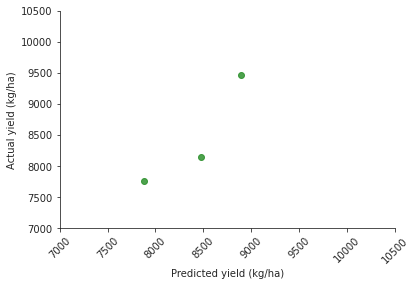

In [ ]:
#Predicted vs actual yield scatter graph
import seaborn as sns
sns.set_style('ticks')
sns.regplot(y_pred, y_test, data=dataset, color="forestgreen", fit_reg=False)
#np.concatenate((y_pred_grid.reshape(len(y_pred_grid), 1), y_test.reshape(len(y_test), 1)), 1)
plt.xlim(7000,10500)
plt.ylim(7000,10500)
plt.xticks(rotation=45)
plt.xlabel("Predicted yield (kg/ha)")
plt.ylabel("Actual yield (kg/ha)")
sns.despine()
plt.savefig('orizica_scatter.png')

## GridSearchCV

In [ ]:
# Attempting gridsearch cross validation for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [600, 800, 1000, 1200],
               'max_features': [1,2],
               'max_depth': [0.5, 1, 3, 4, 5, 7],
               'min_samples_split': [1, 2, 3, 6, 10],
               'min_samples_leaf': [1, 2, 5, 10, 20],
               'learning_rate': [0.001, 0.01, 0.05, 0.1]}

regressor = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=2, verbose=2, return_train_score=True)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
grid_search.best_params_

{'learning_rate': 0.02,
 'max_depth': 1,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [ ]:
# R2, MAE, RMSE
y_pred_grid = grid_search.predict(X_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(r2_score(y_test, y_pred_grid))
print(mean_absolute_error(y_test, y_pred_grid))
mean_squared_error(y_test, y_pred_grid)
print(np.sqrt(mean_squared_error(y_test, y_pred_grid)))

0.33674631917053144
468.25231485593304
595.5435475841767
